## Feature Selection/Engineering

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import norm

from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import joblib

pd.options.display.max_columns = 200
pd.options.display.max_rows = None

In [2]:
df = pd.read_csv('data/Ames_Transaction.csv')
df.shape

(2557, 37)

In [3]:
df.head()

,GeoRefNo,ClassPr_S,ClassSc_S,MA_Zip1,PA-Strt,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,Neighborhood,LotArea,ParType,BldgNo_S,DwlgNo_S,YrBuilt,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,NmbrBRs,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond
0,522105010,RESIDENTIAL,2-STORY 1946 & NEWER,50010,LEDGES,93300,0,279700,373000,HaydnLk,10015,Dwg&Lot,0,1,2016,C'Block,CompShg,VinylSd,VinylSd,BrkFace,GasFWA,Yes,2243,1142,9,4,1,0,Attachd,2016,3.0,647,2017,10,365400,WRDConv,Normal
1,522105010,RESIDENTIAL,2-STORY 1946 & NEWER,50010,LEDGES,93300,0,279700,373000,HaydnLk,10015,Dwg&Lot,0,1,2016,C'Block,CompShg,VinylSd,VinylSd,BrkFace,GasFWA,Yes,2243,1142,9,4,1,0,Attachd,2016,3.0,647,2016,5,75000,WRDConv,Normal
2,522110120,RESIDENTIAL,2-STORY 1946 & NEWER,50010,LEDGES,98100,0,294400,392500,HaydnLk,14904,Dwg&Lot,0,1,2018,P'Conc,CompShg,VinylSd,VinylSd,Stone,GasFWA,Yes,2456,1604,8,4,1,0,Attachd,2018,3.0,744,2019,1,392500,WRDConv,Normal
3,522110120,RESIDENTIAL,2-STORY 1946 & NEWER,50010,LEDGES,98100,0,294400,392500,HaydnLk,14904,Dwg&Lot,0,1,2018,P'Conc,CompShg,VinylSd,VinylSd,Stone,GasFWA,Yes,2456,1604,8,4,1,0,Attachd,2018,3.0,744,2018,1,75000,WRDConv,Normal
4,522150100,RESIDENTIAL,1-STORY 1946 & NEWER ALL STYLES,50010,AUDUBON,80000,0,57300,137300,HaydnLk,9189,Vac.Lot,0,1,0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0,0,0,0,0,0,No Data,0,0.0,0,2018,7,80000,WRDConv,Normal


In [4]:
df.drop(['GeoRefNo', 'ClassPr_S', 'MA_Zip1', 'PA-Strt','BldgNo_S', 'DwlgNo_S'], axis=1, inplace=True)

In [5]:
df.shape

(2557, 31)

In [6]:
df.head()

,ClassSc_S,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,Neighborhood,LotArea,ParType,YrBuilt,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,NmbrBRs,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond
0,2-STORY 1946 & NEWER,93300,0,279700,373000,HaydnLk,10015,Dwg&Lot,2016,C'Block,CompShg,VinylSd,VinylSd,BrkFace,GasFWA,Yes,2243,1142,9,4,1,0,Attachd,2016,3.0,647,2017,10,365400,WRDConv,Normal
1,2-STORY 1946 & NEWER,93300,0,279700,373000,HaydnLk,10015,Dwg&Lot,2016,C'Block,CompShg,VinylSd,VinylSd,BrkFace,GasFWA,Yes,2243,1142,9,4,1,0,Attachd,2016,3.0,647,2016,5,75000,WRDConv,Normal
2,2-STORY 1946 & NEWER,98100,0,294400,392500,HaydnLk,14904,Dwg&Lot,2018,P'Conc,CompShg,VinylSd,VinylSd,Stone,GasFWA,Yes,2456,1604,8,4,1,0,Attachd,2018,3.0,744,2019,1,392500,WRDConv,Normal
3,2-STORY 1946 & NEWER,98100,0,294400,392500,HaydnLk,14904,Dwg&Lot,2018,P'Conc,CompShg,VinylSd,VinylSd,Stone,GasFWA,Yes,2456,1604,8,4,1,0,Attachd,2018,3.0,744,2018,1,75000,WRDConv,Normal
4,1-STORY 1946 & NEWER ALL STYLES,80000,0,57300,137300,HaydnLk,9189,Vac.Lot,0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0,0,0,0,0,0,No Data,0,0.0,0,2018,7,80000,WRDConv,Normal


In [7]:
df.dtypes

ClassSc_S        object
LndAc_S           int64
ImpAc_S           int64
OthAc_S           int64
TtlVal_AsrYr      int64
Neighborhood     object
LotArea           int64
ParType          object
YrBuilt           int64
Foundation       object
RoofMatl         object
Ext1             object
Ext2             object
MasVnrType       object
Heating          object
Central Air      object
GLA               int64
TtlBsmtSF         int64
TotRmsAbvGrd      int64
NmbrBRs           int64
Fireplaces        int64
PoolArea          int64
GarageType       object
GarYrBlt          int64
Cars            float64
GarageArea        int64
YrSold_YYYY       int64
MoSold_MM         int64
SalePrice         int64
SaleType         object
SaleCond         object
dtype: object

In [8]:
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].astype('int')
df['TotRmsAbvGrd'].dtypes

dtype('int64')

In [9]:
df['NmbrBRs'] = df['NmbrBRs'].astype('int')
df['NmbrBRs'].dtypes

dtype('int64')

In [10]:
df['Fireplaces'] = df['Fireplaces'].astype('int')
df['Fireplaces'].dtypes

dtype('int64')

In [11]:
df.dtypes

ClassSc_S        object
LndAc_S           int64
ImpAc_S           int64
OthAc_S           int64
TtlVal_AsrYr      int64
Neighborhood     object
LotArea           int64
ParType          object
YrBuilt           int64
Foundation       object
RoofMatl         object
Ext1             object
Ext2             object
MasVnrType       object
Heating          object
Central Air      object
GLA               int64
TtlBsmtSF         int64
TotRmsAbvGrd      int64
NmbrBRs           int64
Fireplaces        int64
PoolArea          int64
GarageType       object
GarYrBlt          int64
Cars            float64
GarageArea        int64
YrSold_YYYY       int64
MoSold_MM         int64
SalePrice         int64
SaleType         object
SaleCond         object
dtype: object

In [12]:
df.head()

,ClassSc_S,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,Neighborhood,LotArea,ParType,YrBuilt,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,NmbrBRs,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond
0,2-STORY 1946 & NEWER,93300,0,279700,373000,HaydnLk,10015,Dwg&Lot,2016,C'Block,CompShg,VinylSd,VinylSd,BrkFace,GasFWA,Yes,2243,1142,9,4,1,0,Attachd,2016,3.0,647,2017,10,365400,WRDConv,Normal
1,2-STORY 1946 & NEWER,93300,0,279700,373000,HaydnLk,10015,Dwg&Lot,2016,C'Block,CompShg,VinylSd,VinylSd,BrkFace,GasFWA,Yes,2243,1142,9,4,1,0,Attachd,2016,3.0,647,2016,5,75000,WRDConv,Normal
2,2-STORY 1946 & NEWER,98100,0,294400,392500,HaydnLk,14904,Dwg&Lot,2018,P'Conc,CompShg,VinylSd,VinylSd,Stone,GasFWA,Yes,2456,1604,8,4,1,0,Attachd,2018,3.0,744,2019,1,392500,WRDConv,Normal
3,2-STORY 1946 & NEWER,98100,0,294400,392500,HaydnLk,14904,Dwg&Lot,2018,P'Conc,CompShg,VinylSd,VinylSd,Stone,GasFWA,Yes,2456,1604,8,4,1,0,Attachd,2018,3.0,744,2018,1,75000,WRDConv,Normal
4,1-STORY 1946 & NEWER ALL STYLES,80000,0,57300,137300,HaydnLk,9189,Vac.Lot,0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0,0,0,0,0,0,No Data,0,0.0,0,2018,7,80000,WRDConv,Normal


In [13]:
num = list(df.select_dtypes(exclude='object').columns)
num

['LndAc_S',
 'ImpAc_S',
 'OthAc_S',
 'TtlVal_AsrYr',
 'LotArea',
 'YrBuilt',
 'GLA',
 'TtlBsmtSF',
 'TotRmsAbvGrd',
 'NmbrBRs',
 'Fireplaces',
 'PoolArea',
 'GarYrBlt',
 'Cars',
 'GarageArea',
 'YrSold_YYYY',
 'MoSold_MM',
 'SalePrice']

In [14]:
for element in num:
    print(f'{element}:{df[element].unique()}')

LndAc_S:[ 93300  98100  80000 107200 100600  74600  92200 153200  63300  78900
  78700  23800  56200  55900  55100  55600  87500 100500  95300  94500
 100800  55000  50900  54900  58000  79200  82100  54400  52800  82400
  75600 120100 105300 121800 123400 109400 112400 108600 137000 151500
 193300 155600 135700 114200 149800  94200 111100 107100  94700  88900
 122800 139400 131400 146700 136100 414700 115700 157600 157100 125500
  70600  71700  68900  77300  70700  82500  83900  85400  84100  68500
  68300  71600  81600  96300  68600  73700  67400  66900  64500  63000
  59500  69100  49800  56400  50700  55700  61100  59300  53600  55500
  45700  48600  57100  52400  56100  97900  92600  91800  64000  62500
  53900  56900  51700  45600  47700  66000  49500  51200  82800  89700
  86200  66500  62100  53800  58900  55300  77900  90700  66800  57800
  62800  72000  51800  53100  58500  56000  50500  58200  50400  51500
  65300  70500  65400  63100  59800  91400  59900  66400 128600 15680

In [15]:
df[df['TotRmsAbvGrd']==77]

,ClassSc_S,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,Neighborhood,LotArea,ParType,YrBuilt,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,NmbrBRs,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond
1203,1-STORY 1946 & NEWER ALL STYLES,59500,0,178500,238000,N Ames,8092,Dwg&Lot,2010,C'Block,CompShg,Wd Sdng,Wd Sdng,BrkFace,GasFWA,Yes,1182,1050,77,3,0,0,Attachd,1954,1.0,286,2018,9,224350,WRDConv,Normal


In [16]:
df.at[1203, 'TotRmsAbvGrd']=7.0

In [17]:
df.iloc[1203]

ClassSc_S       1-STORY 1946 & NEWER ALL STYLES
LndAc_S                                   59500
ImpAc_S                                       0
OthAc_S                                  178500
TtlVal_AsrYr                             238000
Neighborhood                             N Ames
LotArea                                    8092
ParType                                 Dwg&Lot
YrBuilt                                    2010
Foundation                              C'Block
RoofMatl                                CompShg
Ext1                                    Wd Sdng
Ext2                                    Wd Sdng
MasVnrType                              BrkFace
Heating                                  GasFWA
Central Air                                 Yes
GLA                                        1182
TtlBsmtSF                                  1050
TotRmsAbvGrd                                  7
NmbrBRs                                       3
Fireplaces                              

In [18]:
df[df['NmbrBRs']==33]

,ClassSc_S,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,Neighborhood,LotArea,ParType,YrBuilt,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,NmbrBRs,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond
1314,1-1/2 STORY - UNFINISHED ALL AGES,37700,0,112900,150600,N Ames,6390,Dwg&Lot,1954,C'Block,CompShg,MetalSd,MetalSd,None,GasFWA,Yes,1360,984,4,33,0,0,Detachd,1954,1.0,280,2016,5,178500,WRDConv,Normal


In [19]:
df.at[1314, 'NmbrBRs']=3.0

In [20]:
df.iloc[1314]

ClassSc_S       1-1/2 STORY - UNFINISHED ALL AGES
LndAc_S                                     37700
ImpAc_S                                         0
OthAc_S                                    112900
TtlVal_AsrYr                               150600
Neighborhood                               N Ames
LotArea                                      6390
ParType                                   Dwg&Lot
YrBuilt                                      1954
Foundation                                C'Block
RoofMatl                                  CompShg
Ext1                                      MetalSd
Ext2                                      MetalSd
MasVnrType                                   None
Heating                                    GasFWA
Central Air                                   Yes
GLA                                          1360
TtlBsmtSF                                     984
TotRmsAbvGrd                                    4
NmbrBRs                                         3


In [21]:
df.drop(['ImpAc_S'],axis=1,inplace=True)

In [22]:
df[df['YrBuilt']==0]

,ClassSc_S,LndAc_S,OthAc_S,TtlVal_AsrYr,Neighborhood,LotArea,ParType,YrBuilt,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,NmbrBRs,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond
4,1-STORY 1946 & NEWER ALL STYLES,80000,57300,137300,HaydnLk,9189,Vac.Lot,0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0,0,0,0,0,0,No Data,0,0.0,0,2018,7,80000,WRDConv,Normal
5,1-STORY 1946 & NEWER ALL STYLES,80000,57300,137300,HaydnLk,9189,Vac.Lot,0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0,0,0,0,0,0,No Data,0,0.0,0,2017,4,3999,WRDConv,Abnorml


In [23]:
df.drop([df.index[4],df.index[5]],inplace=True)

In [24]:
df['BldAge_Sold'] = df['YrSold_YYYY']-df['YrBuilt']

In [25]:
df['BldAge_Sold'].unique()

array([  1,   0,  -1,  -2,  60,  50,  19,  18,  20,  21,  22,  11,  12,
        15,  17,   2,  14,  27,  25,  23,  26,  24,  53,  52,  59,  57,
        44,  43,  46,  45,  13,  28,  32,  29,  33,  34,  30,  70,  31,
        47,  10,  61,  68,  65,  38,  35,  36,  40,  42,  39,  37,  41,
        16,   7,  49,  48,   4,  51,   9,   5,   8,   6,   3,  56,  54,
        55, 101,  58,  64,  62,  90,  72,  71,  77,  76,  80,  78,  75,
        79, 108,  67,  63,  66,  69,  94, 100,  96, 128,  88, 119, 116,
        98,  91, 106,  97, 138, 118,  99,  92, 113, 102, 112,  87, 107,
        93, 117,  74,  73, 126,  82, 103, 111, 121, 127,  86, 109, 104,
       125, 105, 124, 132, 131,  81,  89,  83, 115,  84,  95, 139,  85,
       123])

In [26]:
df[df['BldAge_Sold']<0].head()

,ClassSc_S,LndAc_S,OthAc_S,TtlVal_AsrYr,Neighborhood,LotArea,ParType,YrBuilt,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,NmbrBRs,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond,BldAge_Sold
9,1-STORY 1946 & NEWER ALL STYLES,100600,301900,402500,HaydnLk,9200,Dwg&Lot,2018,P'Conc,CompShg,VinylSd,VinylSd,Stone,GasFWA,Yes,1552,1552,7,2,1,0,Attachd,2018,3.0,825,2017,12,76000,WRDConv,Normal,-1
10,1-STORY 1946 & NEWER ALL STYLES,100600,301900,402500,HaydnLk,9200,Dwg&Lot,2018,P'Conc,CompShg,VinylSd,VinylSd,Stone,GasFWA,Yes,1552,1552,7,2,1,0,Attachd,2018,3.0,825,2017,4,3999,WRDConv,Abnorml,-1
12,1-STORY TWNHM - 1946 & NEWER,74600,223800,298400,HaydnLk,7153,Dwg&Lot,2017,C'Block,CompShg,VinylSd,VinylSd,Stone,GasFWA,Yes,1429,1297,8,2,1,0,Attachd,2017,2.0,473,2016,12,63693,WRDConv,Alloca,-1
14,SPLIT OR MULTI-LEVEL,153200,459600,612800,HaydnLk,14033,Dwg&Lot,2018,P'Conc,CompShg,CemntBd,CmentBd,None,GasFWA,Yes,2892,1864,10,4,1,0,Attachd,2018,3.0,1298,2016,3,100000,WRDConv,Normal,-2
56,1-STORY 1946 & NEWER ALL STYLES,123400,240600,364000,HaydnLk,10727,Dwg&Lot,2018,P'Conc,CompShg,HdBoard,HdBoard,Stone,GasFWA,Yes,2000,1975,7,3,1,0,Attachd,2018,3.0,1036,2016,3,90873,WRDConv,Alloca,-2


In [27]:
print(df[df['BldAge_Sold']<0].shape)

(57, 31)


In [28]:
df.drop(df[df['BldAge_Sold']<0].index, axis=0, inplace=True)

In [29]:
print(df[df['BldAge_Sold']<0].shape)

(0, 31)


In [30]:
df.drop(['YrBuilt'], axis=1, inplace = True)

In [31]:
df['YrSold_YYYY'] = df['YrSold_YYYY'].astype('int32').astype('object')
df['YrSold_YYYY'].dtypes

dtype('O')

In [32]:
df['MoSold_MM'] = df['MoSold_MM'].astype('int32').astype('object')
df['MoSold_MM'].dtypes

dtype('O')

In [33]:
print(df.shape)
print(df.columns)
df.head()

(2498, 30)
Index(['ClassSc_S', 'LndAc_S', 'OthAc_S', 'TtlVal_AsrYr', 'Neighborhood',
       'LotArea', 'ParType', 'Foundation', 'RoofMatl', 'Ext1', 'Ext2',
       'MasVnrType', 'Heating', 'Central Air', 'GLA', 'TtlBsmtSF',
       'TotRmsAbvGrd', 'NmbrBRs', 'Fireplaces', 'PoolArea', 'GarageType',
       'GarYrBlt', 'Cars', 'GarageArea', 'YrSold_YYYY', 'MoSold_MM',
       'SalePrice', 'SaleType', 'SaleCond', 'BldAge_Sold'],
      dtype='object')


,ClassSc_S,LndAc_S,OthAc_S,TtlVal_AsrYr,Neighborhood,LotArea,ParType,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,NmbrBRs,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond,BldAge_Sold
0,2-STORY 1946 & NEWER,93300,279700,373000,HaydnLk,10015,Dwg&Lot,C'Block,CompShg,VinylSd,VinylSd,BrkFace,GasFWA,Yes,2243,1142,9,4,1,0,Attachd,2016,3.0,647,2017,10,365400,WRDConv,Normal,1
1,2-STORY 1946 & NEWER,93300,279700,373000,HaydnLk,10015,Dwg&Lot,C'Block,CompShg,VinylSd,VinylSd,BrkFace,GasFWA,Yes,2243,1142,9,4,1,0,Attachd,2016,3.0,647,2016,5,75000,WRDConv,Normal,0
2,2-STORY 1946 & NEWER,98100,294400,392500,HaydnLk,14904,Dwg&Lot,P'Conc,CompShg,VinylSd,VinylSd,Stone,GasFWA,Yes,2456,1604,8,4,1,0,Attachd,2018,3.0,744,2019,1,392500,WRDConv,Normal,1
3,2-STORY 1946 & NEWER,98100,294400,392500,HaydnLk,14904,Dwg&Lot,P'Conc,CompShg,VinylSd,VinylSd,Stone,GasFWA,Yes,2456,1604,8,4,1,0,Attachd,2018,3.0,744,2018,1,75000,WRDConv,Normal,0
6,1-STORY 1946 & NEWER ALL STYLES,107200,321600,428800,HaydnLk,13915,Dwg&Lot,P'Conc,CompShg,CemntBd,CmentBd,Stone,GasFWA,Yes,1824,1824,7,2,1,0,Attachd,2017,3.0,1057,2018,6,502915,NewSold,Partial,1


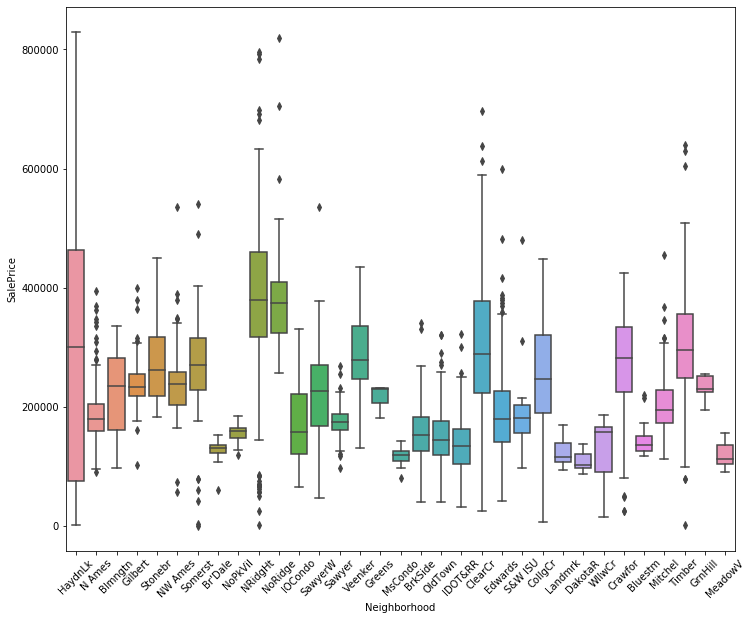

In [34]:
plt.figure(figsize=(12,10))
sns.boxplot(df['Neighborhood'], df['SalePrice'])
plt.xticks(rotation=45)
plt.show()

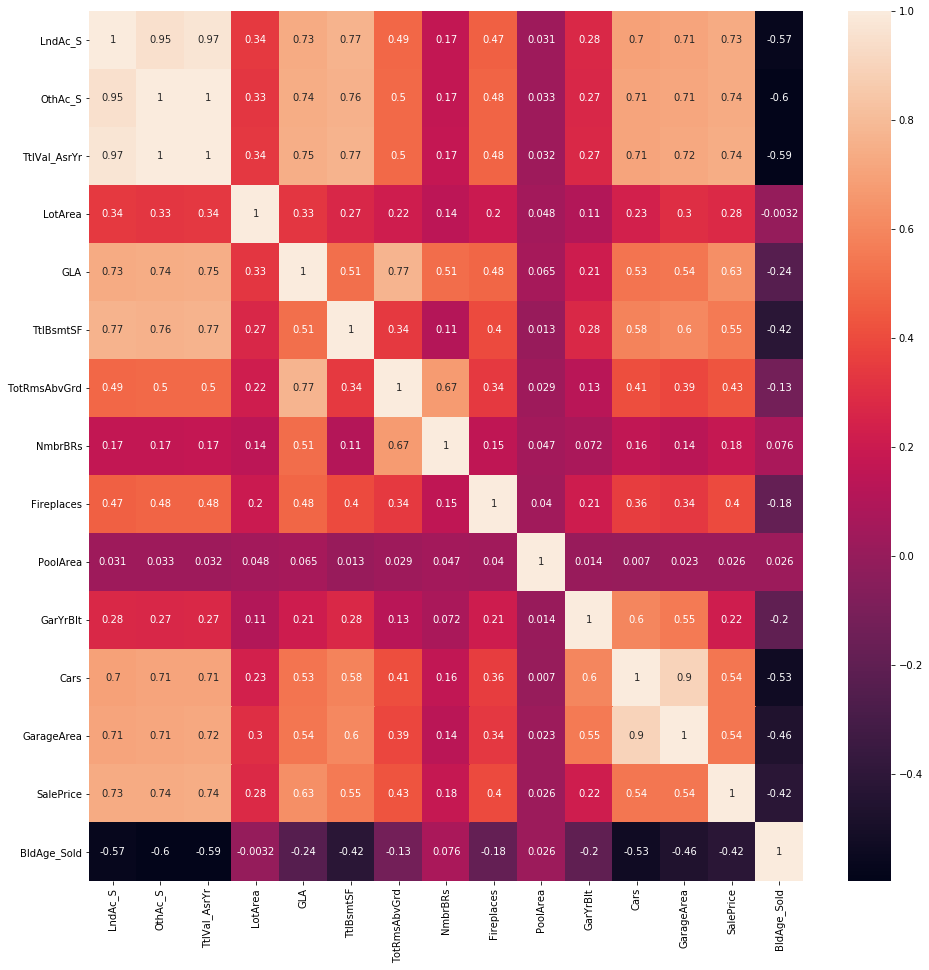

In [35]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [36]:
df['Pool'] = np.where(df['PoolArea']==0, 0, 1).astype('object')
df['Garage'] = np.where(df['GarageArea']==0, 0, 1).astype('object')

In [37]:
df.drop(['LndAc_S','OthAc_S', 'Cars', 'PoolArea', 'GarYrBlt', 'NmbrBRs'], axis=1, inplace=True)

In [38]:
num = list(df.select_dtypes(exclude='object').columns)
num

['TtlVal_AsrYr',
 'LotArea',
 'GLA',
 'TtlBsmtSF',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'SalePrice',
 'BldAge_Sold']

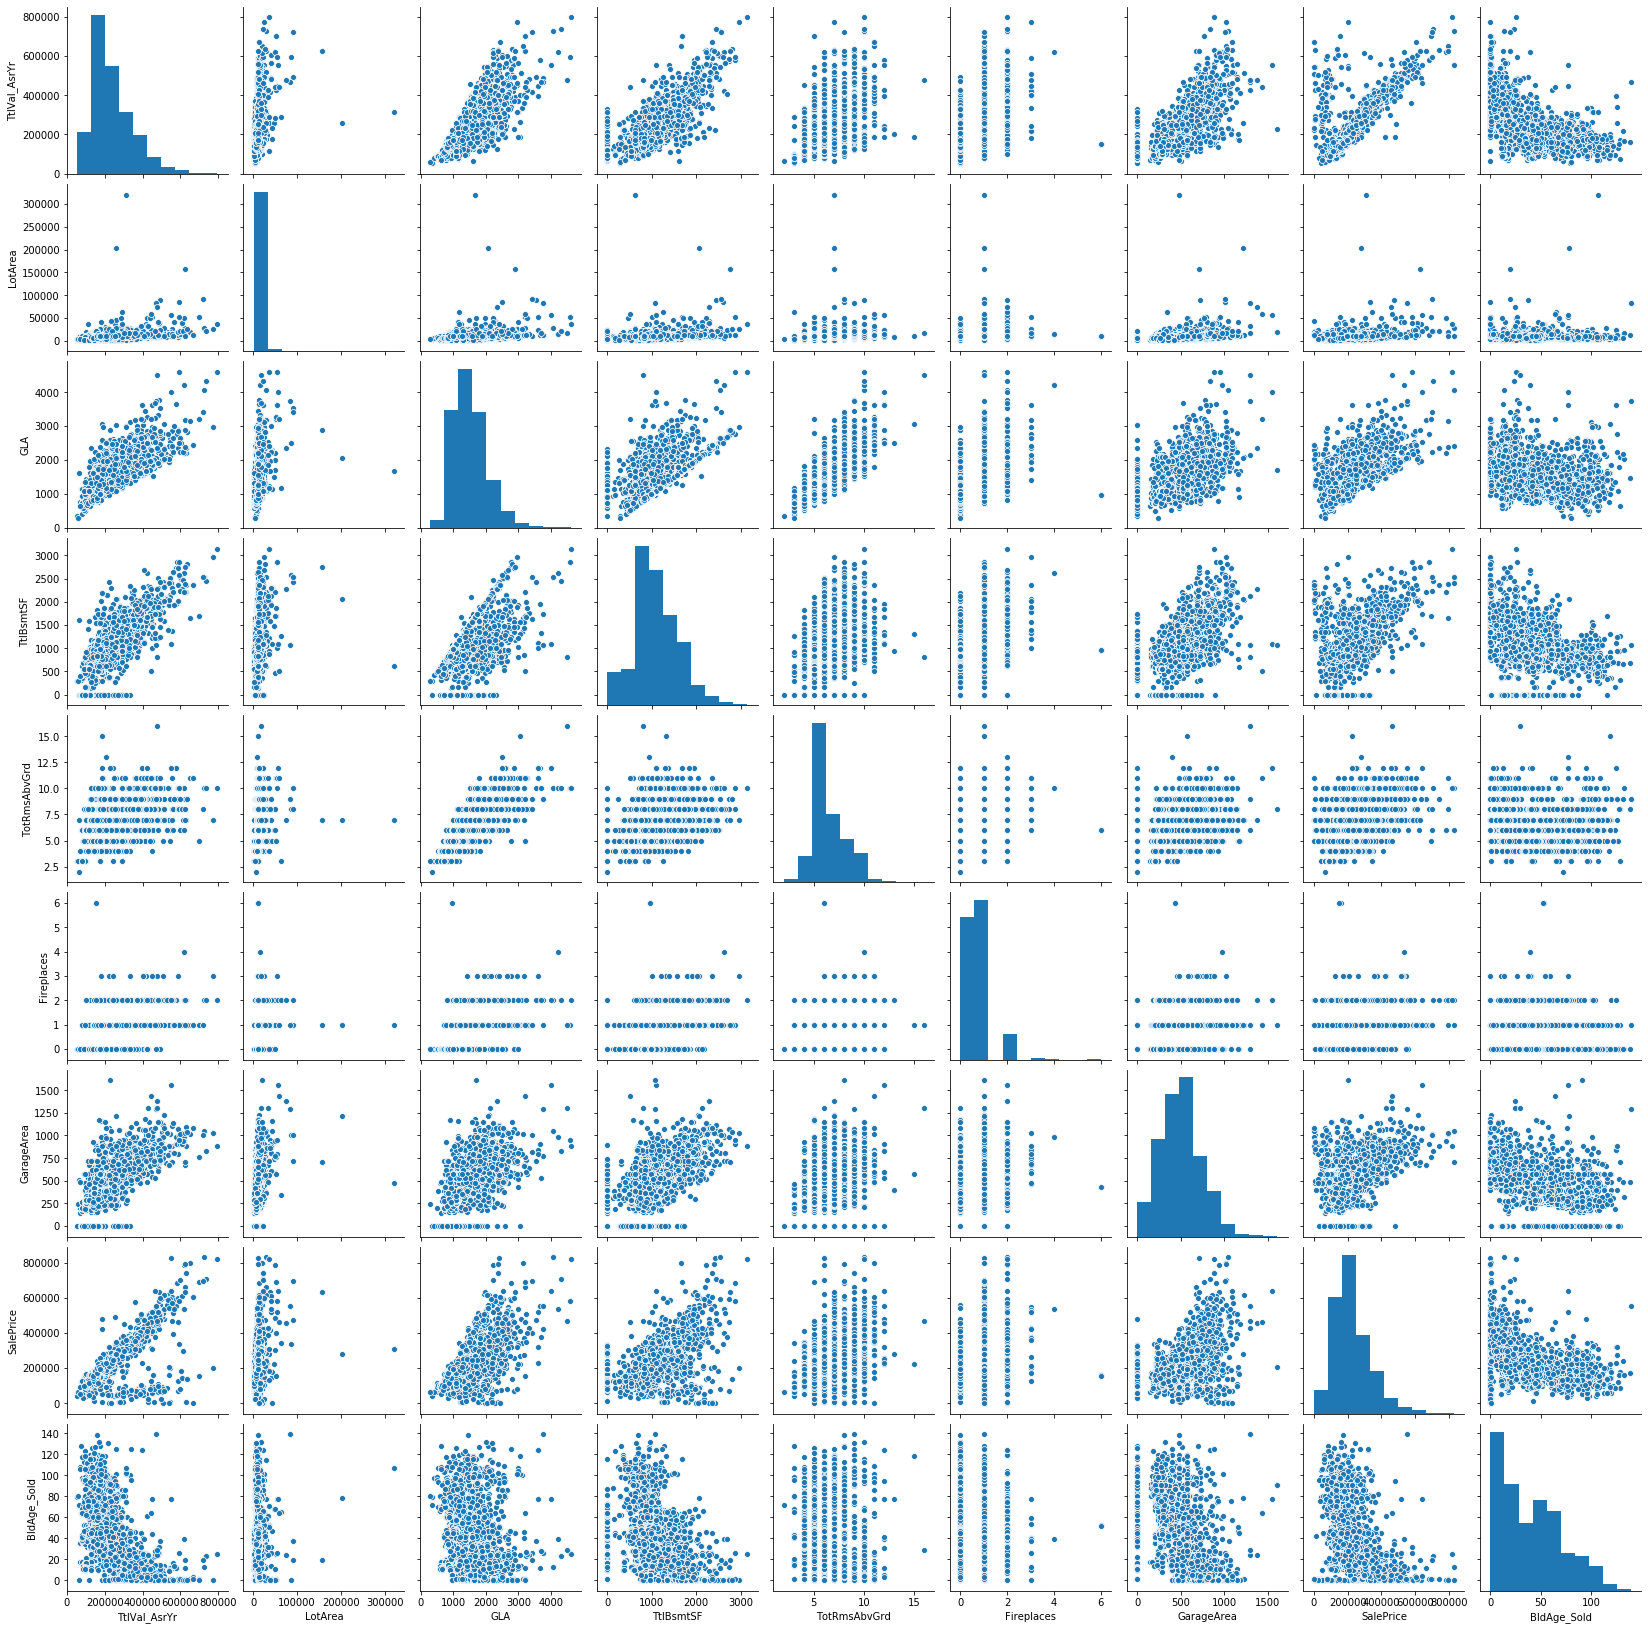

In [39]:
sns.pairplot(df[num])

In [40]:
dt = pd.get_dummies(df)
dt.shape

(2498, 157)

---

## Split Train/Test Set

In [41]:
y = dt['SalePrice']
X = dt.drop(['SalePrice'], axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [43]:
X_test.head()

,TtlVal_AsrYr,LotArea,GLA,TtlBsmtSF,TotRmsAbvGrd,Fireplaces,GarageArea,BldAge_Sold,ClassSc_S_1-1/2 STORY - UNFINISHED ALL AGES,ClassSc_S_1-1/2 STORY FINISHED ALL AGES,ClassSc_S_1-1/2 STORY TWNHM - ALL AGES,ClassSc_S_1-STORY 1945 & OLDER,ClassSc_S_1-STORY 1946 & NEWER ALL STYLES,ClassSc_S_1-STORY TWNHM - 1946 & NEWER,ClassSc_S_2 FAMILY CONVERSION - ALL STYLES AND AGES,ClassSc_S_2-1/2 STORY ALL AGES,ClassSc_S_2-STORY 1945 & OLDER,ClassSc_S_2-STORY 1946 & NEWER,ClassSc_S_2-STORY TWNHM - 1946 & NEWER,ClassSc_S_CONDO,ClassSc_S_DUPLEX - ALL STYLES AND AGES,ClassSc_S_SPLIT FOYER,ClassSc_S_SPLIT OR MULTI-LEVEL,Neighborhood_Blmngtn,Neighborhood_Bluestm,Neighborhood_Br'Dale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_DakotaR,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_HaydnLk,Neighborhood_IDOT&RR,Neighborhood_IOCondo,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_MsCondo,Neighborhood_N Ames,Neighborhood_NRidgHt,Neighborhood_NW Ames,Neighborhood_NoPkVil,Neighborhood_NoRidge,Neighborhood_OldTown,Neighborhood_S&W ISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Stonebr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_WllwCr,ParType_Dwg&Lot,Foundation_Brk/Til,Foundation_C'Block,Foundation_P'Conc,Foundation_Slab,Foundation_Stone,Foundation_Wood,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Ext1_AsbShng,Ext1_BrkComm,Ext1_BrkFace,Ext1_CemntBd,Ext1_HdBoard,Ext1_ImStucc,Ext1_MetalSd,Ext1_Plywood,Ext1_Stucco,Ext1_VinylSd,Ext1_Wd Sdng,Ext1_WdShing,Ext2_AsbShng,Ext2_Brk Cmn,Ext2_BrkFace,Ext2_CmentBd,Ext2_HdBoard,Ext2_ImStucc,Ext2_MetalSd,Ext2_Other,Ext2_Plywood,Ext2_Stone,Ext2_Stucco,Ext2_VinylSd,Ext2_Wd Sdng,Ext2_Wd Shng,MasVnrType_Brk Cmn,MasVnrType_BrkFace,MasVnrType_No Data,MasVnrType_None,MasVnrType_Stone,Heating_FWA-Oth,Heating_GasFWA,Heating_GasHWat,Heating_Geothrm,Heating_Gravity,Heating_HeatPmp,Heating_No Data,Heating_OthrHW,Heating_WallHtr,Central Air_No,Central Air_No Data,Central Air_Yes,GarageType_2 Types,GarageType_Attachd,GarageType_Basment,GarageType_BuiltIn,GarageType_Carport,GarageType_Detachd,GarageType_No Data,GarageType_None,YrSold_YYYY_2016,YrSold_YYYY_2017,YrSold_YYYY_2018,YrSold_YYYY_2019,MoSold_MM_1,MoSold_MM_2,MoSold_MM_3,MoSold_MM_4,MoSold_MM_5,MoSold_MM_6,MoSold_MM_7,MoSold_MM_8,MoSold_MM_9,MoSold_MM_10,MoSold_MM_11,MoSold_MM_12,SaleType_COD/Est,SaleType_CtrLD&I,SaleType_CtrLInt,SaleType_CtrLwDn,SaleType_NewCost,SaleType_NewSold,SaleType_Other,SaleType_WRDCash,SaleType_WRDConv,SaleCond_Abnorml,SaleCond_AdjLand,SaleCond_Alloca,SaleCond_Family,SaleCond_Normal,SaleCond_Partial,Pool_0,Pool_1,Garage_0,Garage_1
60,493600,10727,2184,2184,9,0,807,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1
2449,250400,7898,1734,847,7,1,444,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1
2368,174800,9187,1080,1084,5,0,484,34,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1
764,279200,8368,1411,1411,7,0,463,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1

In [44]:
df.iloc[60]

ClassSc_S       1-STORY 1946 & NEWER ALL STYLES
TtlVal_AsrYr                             456900
Neighborhood                            HaydnLk
LotArea                                   15229
ParType                                 Dwg&Lot
Foundation                               P'Conc
RoofMatl                                CompShg
Ext1                                    VinylSd
Ext2                                    VinylSd
MasVnrType                                Stone
Heating                                  GasFWA
Central Air                                 Yes
GLA                                        1525
TtlBsmtSF                                  1525
TotRmsAbvGrd                                  7
Fireplaces                                    1
GarageType                              Attachd
GarageArea                                  979
YrSold_YYYY                                2017
MoSold_MM                                    10
SalePrice                               

---

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

---

## Linear Regression

In [46]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [47]:
estimators = [('normalise', StandardScaler()),
              ('linreg', Lasso())]

pipe = Pipeline(estimators)

pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.6508524010804808

In [48]:
estimators = [('normalise', StandardScaler()),
              ('linreg', Ridge())]

pipe = Pipeline(estimators)

pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.650828858408967

In [49]:
#estimators = [('normalise', StandardScaler()),
#              ('model', Lasso())]
#
#pipe = Pipeline(estimators)
#
#param_grid = [{'model': [Lasso(), Ridge()],
#               'normalise': [StandardScaler(), RobustScaler(), MinMaxScaler()],
#               'model__alpha': [0.0001, 0.0003, 0.0005, 0.0007, 0.0009, 0.001, 0.003, 0.005, 0.007, 0.009]}]
#
#grid = GridSearchCV(pipe, param_grid, cv=5)
#fittedgrid = grid.fit(X_train, y_train)

In [50]:
#joblib.dump(fittedgrid, 'linreg.pkl')

In [51]:
linreg = joblib.load('linreg.pkl')

In [52]:
linreg.best_estimator_

Pipeline(memory=None,
         steps=[('normalise', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 Ridge(alpha=0.009, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [53]:
linreg.score(X_train, y_train)

0.7146182776093366

In [54]:
linreg.score(X_test, y_test)

0.6508489198933228

---

## KNN

In [55]:
from sklearn.neighbors import KNeighborsRegressor

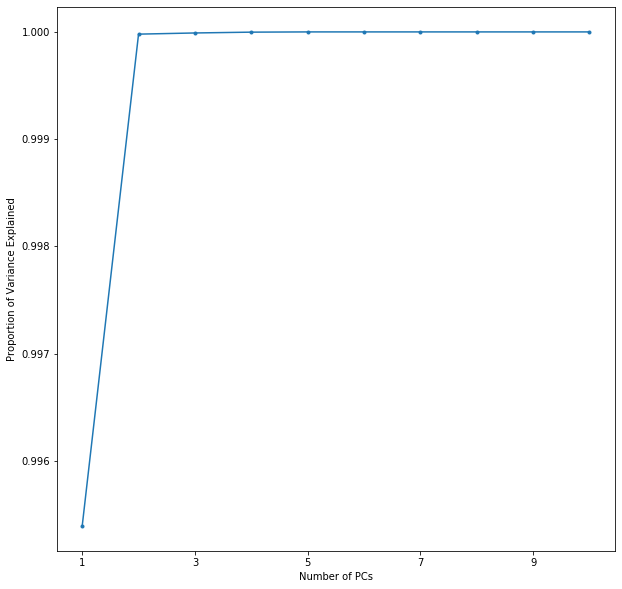

In [56]:
my_pca = PCA(n_components=10)
my_pca.fit(X_train)

# transform data 
X_PCA = my_pca.transform(X_train)

expl_var = my_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(10,10))
plt.plot(range(1,11),expl_var,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,11,2))
plt.show()

In [57]:
#estimators = [('normalise', StandardScaler()),
#              ('PCA', PCA()),
#              ('model', KNeighborsRegressor())]
#
#pipe = Pipeline(estimators)
#
#components = np.arange(1,21,step=2)
#
#param_grid = [{'model': [KNeighborsRegressor()],
#               'normalise': [StandardScaler(), MinMaxScaler(), None],
#               'PCA__n_components': components,
#               'model__n_neighbors': [1,3,5,7,9,11,13]}]
#
#grid = GridSearchCV(pipe, param_grid, cv=5)
#knn_fittedgrid = grid.fit(X_train, y_train)

In [58]:
#joblib.dump(knn_fittedgrid, 'knn.pkl')

In [59]:
knn = joblib.load('knn.pkl')

In [60]:
knn.best_estimator_

Pipeline(memory=None,
         steps=[('normalise',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=17,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=5, p=2,
                                     weights='uniform'))],
         verbose=False)

In [61]:
knn.score(X_train, y_train)

0.7732406016765994

In [62]:
knn.score(X_test, y_test)

0.6252673594385556

---

## Decision Tree

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
#estimators = [('PCA', PCA()),
#              ('model', DecisionTreeRegressor())]
#
#pipe = Pipeline(estimators)
#
#components = np.arange(1,21,step=2)
#
#depth = np.arange(1,11,step=2)
#
#param_grid = [{'model': [DecisionTreeRegressor()],
#               'PCA__n_components': components,
#               'model__max_depth': depth}]
#
#grid = GridSearchCV(pipe, param_grid, cv=5)
#dtc_fittedgrid = grid.fit(X_train, y_train)

In [65]:
#joblib.dump(dtc_fittedgrid, 'dtc.pkl')

In [66]:
dtc = joblib.load('dtc.pkl')

In [67]:
dtc.best_estimator_

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=17,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 DecisionTreeRegressor(criterion='mse', max_depth=5,
                                       max_features=None, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort=False, random_state=None,
                                       splitter='best'))],
         verbose=False)

In [68]:
dtc.score(X_train, y_train)

0.7253463091984117

In [69]:
dtc.score(X_test, y_test)

0.401870069168799

---

## SVR (Support Vector Regression)

In [70]:
from sklearn.svm import SVR

In [71]:
#estimators = [('normalise', StandardScaler()),
#              ('PCA', PCA()),
#              ('model', SVR())]
#
#pipe = Pipeline(estimators)
#
#components = np.arange(1,21,step=2)
#
#c = list(10**i for i in range(-5,5))
#
#kernel = ['linear', 'poly', 'rbf', 'sigmoid']
#
#param_grid = [{'model': [SVR()],
#               'normalise': [StandardScaler(), MinMaxScaler(), RobustScaler()],
#               'PCA__n_components': components,
#               'model__kernel':kernel,
#               'model__C': c}]
#
#grid = GridSearchCV(pipe, param_grid, cv=5)
#svr_fittedgrid = grid.fit(X_train, y_train)

In [72]:
#joblib.dump(svr_fittedgrid, 'svr.pkl')

In [73]:
svr = joblib.load('svr.pkl')

In [74]:
svr.best_estimator_

Pipeline(memory=None,
         steps=[('normalise',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=17,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [75]:
svr.score(X_train, y_train)

0.6458570312207996

In [76]:
svr.score(X_test, y_test)

0.5684300758046847

---
## Boosting

In [77]:
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [78]:
XGB_model = XGBRegressor(verbosity=0)
AB_model = AdaBoostRegressor()
RF_model = RandomForestRegressor(n_jobs=3)

XGB_model.fit(X_train, y_train)
AB_model.fit(X_train, y_train)
RF_model.fit(X_train, y_train)

print("Test Set Scores:")
print(f"AdaBoost R^2: {AB_model.score(X_test, y_test)}")
print(f"Random Forest R^2: {RF_model.score(X_test, y_test)}")
print(f"XG Boost R^2: {XGB_model.score(X_test, y_test)}")

Test Set Scores:
AdaBoost R^2: 0.6184755690083215
Random Forest R^2: 0.8323862618334584
XG Boost R^2: 0.8599138312412656


In [79]:
#estimators = [('normalise', StandardScaler()),
#              ('model', XGBRegressor())]
#
#pipe = Pipeline(estimators)
#
#learn_rate = np.arange(0.01, 0.1, 0.01)
#
#depth = [1,2,3,4,5,6]
#
#n_estimator = range(50, 200, 50)
#
#param_grid = [{'model': [XGBRegressor(verbosity=0)],
#               'model__max_depth': depth,
#               'model__learning_rate': learn_rate,
#               'model__n_estimators': n_estimator
#               }]
#
#grid = GridSearchCV(pipe, param_grid, cv=5)
#xgb_fittedgrid = grid.fit(X_train, y_train)

In [80]:
#joblib.dump(xgb_fittedgrid, 'xgb_grid.pkl')

In [81]:
xgb = joblib.load('xgb_grid.pkl')

In [82]:
xgb.best_estimator_

Pipeline(memory=None,
         steps=[('normalise',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.09,
                              max_delta_step=0, max_depth=4, min_child_weight=1,
                              missing=nan, n_estimators=150, n_jobs=1,
                              nthread=None, objective='reg:linear',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,
                              subsample=1, verbosity=0))],
         verbose=False)

In [83]:
xgb.score(X_train, y_train)

0.9685497872881365

In [84]:
xgb.score(X_test, y_test)

0.8339121089064628

In [85]:
estimators = [('normalise', StandardScaler()),
              ('model', XGBRegressor(verbosity=0, learning_rate=0.09, n_estimator=100, max_depth=3))]

pipe = Pipeline(estimators)

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8643402137608738

---

## CNN (Keras)

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras import optimizers
from sklearn.metrics import mean_absolute_error 

In [87]:
my_scaler = StandardScaler()
X_train_cnn = my_scaler.fit_transform(X_train)
X_test_cnn = my_scaler.transform(X_test)

In [88]:
X_train_cnn.shape

(1998, 156)

In [89]:
cnn_model = Sequential()

cnn_model.add(Dense(256, activation='relu', kernel_initializer='normal', input_shape = (156,)))
cnn_model.add(Dense(128, kernel_initializer='normal', activation='relu'))
cnn_model.add(Dense(256, kernel_initializer='normal', activation='relu'))

cnn_model.add(Dense(1, kernel_initializer='normal', activation='linear'))

In [90]:
optimizer = optimizers.RMSprop(0.0099)
cnn_model.compile(loss='mean_squared_error', optimizer=optimizer)
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               40192     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 106,369
Trainable params: 106,369
Non-trainable params: 0
_________________________________________________________________


In [104]:
cnn_model.fit(X_train_cnn, y_train, epochs=200, verbose = 1)

Epoch 1/200
1998/1998 [==============================] - 1s 320us/step - loss: 13374598.1016
Epoch 2/200
1998/1998 [==============================] - 1s 383us/step - loss: 14155199.0330
Epoch 3/200
1998/1998 [==============================] - 1s 273us/step - loss: 13183384.2337
Epoch 4/200
1998/1998 [==============================] - 1s 284us/step - loss: 14255728.4264
Epoch 5/200
1998/1998 [==============================] - 1s 522us/step - loss: 16591657.0556
Epoch 6/200
1998/1998 [==============================] - 1s 290us/step - loss: 12332992.4780
Epoch 7/200
1998/1998 [==============================] - 1s 362us/step - loss: 14944879.1491
Epoch 8/200
1998/1998 [==============================] - 1s 292us/step - loss: 13653829.5035
Epoch 9/200
1998/1998 [==============================] - 1s 282us/step - loss: 14738912.1677
Epoch 10/200
1998/1998 [==============================] - 1s 338us/step - loss: 16578699.3053
Epoch 11/200
1998/1998 [==============================] - 1s 306us/st

1998/1998 [==============================] - 1s 285us/step - loss: 14398358.9484
Epoch 89/200
1998/1998 [==============================] - 1s 272us/step - loss: 14200867.0981
Epoch 90/200
1998/1998 [==============================] - 1s 400us/step - loss: 12843449.9580
Epoch 91/200
1998/1998 [==============================] - 1s 533us/step - loss: 17594556.9900
Epoch 92/200
1998/1998 [==============================] - 1s 406us/step - loss: 13727565.8478
Epoch 93/200
1998/1998 [==============================] - 1s 278us/step - loss: 14498502.5170
Epoch 94/200
1998/1998 [==============================] - 1s 264us/step - loss: 14793654.1582
Epoch 95/200
1998/1998 [==============================] - 1s 279us/step - loss: 13052876.2062
Epoch 96/200
1998/1998 [==============================] - 1s 265us/step - loss: 15137929.7908
Epoch 97/200
1998/1998 [==============================] - 1s 271us/step - loss: 13743834.7705
Epoch 98/200
1998/1998 [==============================] - 1s 306us/step -

1998/1998 [==============================] - 1s 274us/step - loss: 14826129.5731
Epoch 175/200
1998/1998 [==============================] - 1s 289us/step - loss: 12846451.0030
Epoch 176/200
1998/1998 [==============================] - 1s 309us/step - loss: 13793540.1081
Epoch 177/200
1998/1998 [==============================] - 1s 399us/step - loss: 15451454.2658
Epoch 178/200
1998/1998 [==============================] - 1s 409us/step - loss: 13012143.1877
Epoch 179/200
1998/1998 [==============================] - 1s 293us/step - loss: 12981092.7467
Epoch 180/200
1998/1998 [==============================] - 1s 408us/step - loss: 13648293.2037
Epoch 181/200
1998/1998 [==============================] - 1s 311us/step - loss: 14225867.5240
Epoch 182/200
1998/1998 [==============================] - 1s 652us/step - loss: 13528189.4805
Epoch 183/200
1998/1998 [==============================] - 0s 243us/step - loss: 13669420.4054
Epoch 184/200
1998/1998 [==============================] - 0s 19

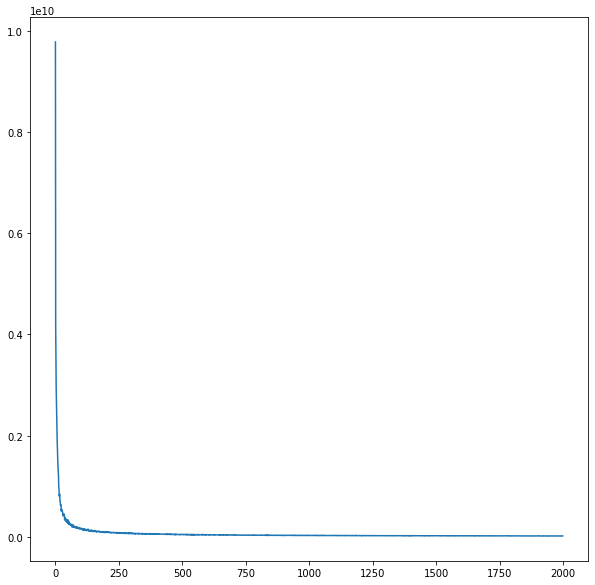

In [92]:
# plot
#plt.figure(figsize=(10,10))
#plt.plot(history.history['loss'])
#plt.show()

In [107]:
cnn_model.evaluate(X_test_cnn, y_test, verbose = 1)

500/500 [==============================] - 0s 67us/step


5096549664.768

In [110]:
np.sqrt(cnn_model.evaluate(X_test_cnn, y_test, verbose = 1))

500/500 [==============================] - 0s 105us/step


71390.1230197007

In [142]:
prediction = cnn_model.predict(X_test_cnn)

In [152]:
cnn_prediction = []

for i in range(0, len(prediction)):
    cnn_prediction.append(prediction[i][0])

---
## Model Comparison

In [96]:
from sklearn.metrics import mean_squared_error

In [115]:
models = [linreg, knn, dtc, svr, xgb]
my_model = ['linreg', 'knn', 'dtc', 'svr', 'xgb']
RMSE = []

for i in range(0, len(models)):
    pred_df = models[i].predict(X_test)
    RMSE.append({'Model': my_model[i], 'R^2':models[i].score(X_test, y_test), 
                 'RMSE':np.sqrt(mean_squared_error(y_test, pred_df))})

model_RMSE = pd.DataFrame(RMSE)

model_RMSE = model_RMSE.append(pd.Series(['cnn', '-', 71390.1230197007], index=model_RMSE.columns),ignore_index=True)

In [116]:
model_RMSE

,Model,R^2,RMSE
0,linreg,0.650849,68563.836636
1,knn,0.625267,71031.204336
2,dtc,0.40187,89740.024592
3,svr,0.56843,76227.908190
4,xgb,0.833912,47288.702913
5,cnn,-,71390.123020


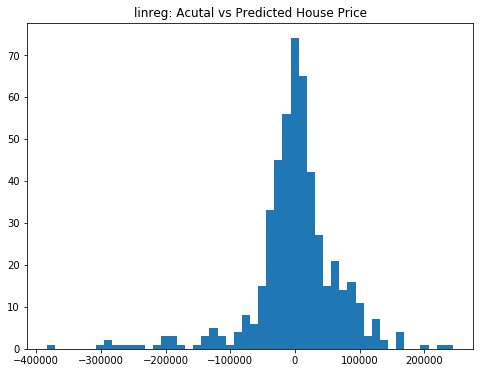

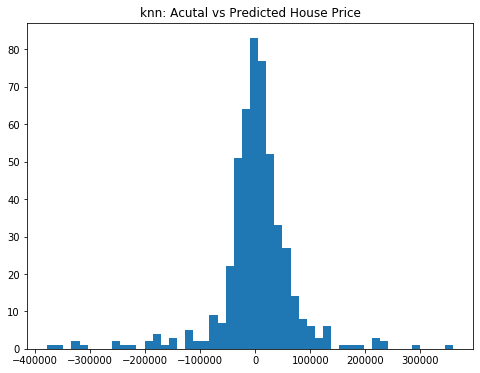

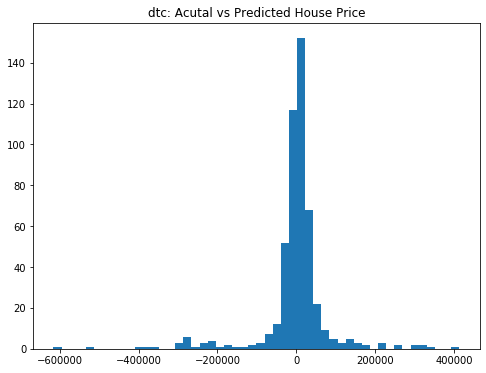

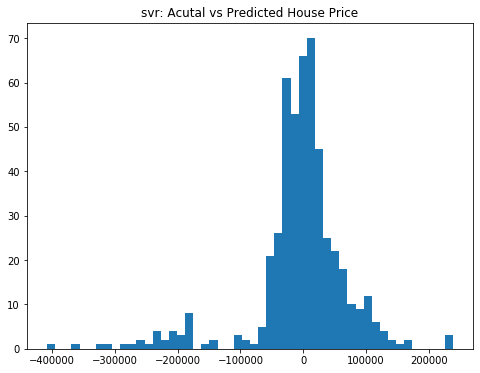

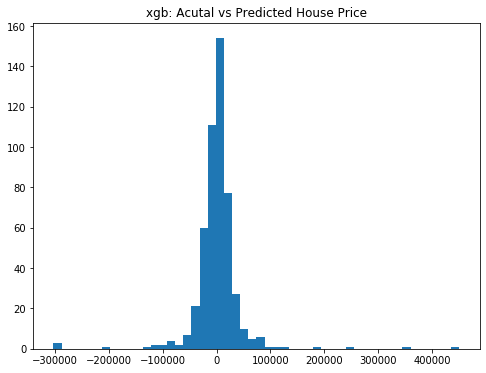

In [126]:
models = [linreg, knn, dtc, svr, xgb]
for i in range(0, len(models)):
    diff = []
    diff.append(y_test - models[i].predict(X_test))
    
    plt.figure(figsize=(8,6))
    plt.hist(diff, bins=50)
    plt.title(f'{my_model[i]}: Acutal vs Predicted House Price')
    plt.show()

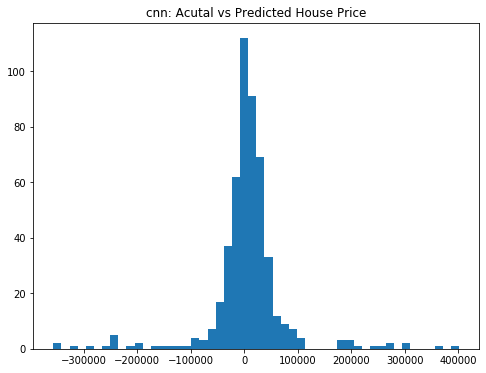

In [155]:
diff = y_test - cnn_prediction
plt.figure(figsize=(8,6))
plt.hist(diff, bins=50)
plt.title('cnn: Acutal vs Predicted House Price')
plt.show()

---
#### XGBoost Prediction vs Actual House Price

In [100]:
prediction = pipe.predict(X_test)

In [101]:
pred_df = pd.DataFrame(data = prediction, columns = ['prediction'], index = X_test.index.copy())
df_out = pd.merge(df, pred_df, how = 'left', left_index = True, right_index = True)

In [102]:
pd.options.display.max_columns = 15
df_out[df_out['prediction'].isna()==False].head()

,ClassSc_S,TtlVal_AsrYr,Neighborhood,LotArea,ParType,Foundation,RoofMatl,...,SalePrice,SaleType,SaleCond,BldAge_Sold,Pool,Garage,prediction
1,2-STORY 1946 & NEWER,373000,HaydnLk,10015,Dwg&Lot,C'Block,CompShg,...,75000,WRDConv,Normal,0,0,1,95552.406250
15,1-STORY 1946 & NEWER ALL STYLES,253100,N Ames,16012,Dwg&Lot,C'Block,CompShg,...,245500,COD/Est,Normal,60,0,1,254358.625000
16,1-STORY 1946 & NEWER ALL STYLES,315500,N Ames,13404,Dwg&Lot,C'Block,CompShg,...,314900,WRDConv,Normal,60,0,1,304775.406250
20,CONDO,152100,Blmngtn,4693,Dwg&Lot,P'Conc,CompShg,...,167500,WRDConv,Normal,18,0,1,162904.296875
23,1-STORY TWNHM - 1946 & NEWER,223600,Gilbert,2812,Dwg&Lot,P'Conc,CompShg,...,245000,COD/Est,Normal,19,0,1,222716.609375


Compliled by Bernice Liang